# Sistemas depredador-presa discretos

In [33]:
using Plots

Usaremos las siguientes ecuaciones para modelar la interacción de depredador presa. 

$P_{t+1}=P_t+\alpha P_t(1-P_t)-\beta D_t = P_t(1+(1-P_t))-\beta P_tD_t$

$D_{t+1}=D_t-\delta D_t+\gamma D_tP_t= D_t(1-\delta)+ \gamma D_tP_t$



In [122]:
function LotkaVolterra(X,parametros)
    x=X[1]
    y=X[2]
    a=parametros[1]
    b=parametros[2]
    c=parametros[3]
    d=parametros[4]
    z1=x+a*x*(1-x)-b*x*y
    z2=y-c*y+d*x*y
    return(z1,z2)
end

LotkaVolterra (generic function with 1 method)

Veamos un ejemplo con parámetros específicos:

In [189]:
parametros=[1.3,0.5,0.7,1.6]


4-element Array{Float64,1}:
 1.3
 0.5
 0.7
 1.6

In [194]:
parametros1=[1.3,0.5,0.3,1.6]

4-element Array{Float64,1}:
 1.3
 0.5
 0.3
 1.6

In [213]:
function Orbita(x0,parametros,iteraciones)
    X=[]
    Y=[]
    T=[]
    x=x0
    for i in 1:iteraciones
        push!(X,x[1])
        push!(Y,x[2])
        push!(T,i)
        x=LotkaVolterra(x,parametros)
    end
    return[X,Y,T]
end

Orbita (generic function with 1 method)


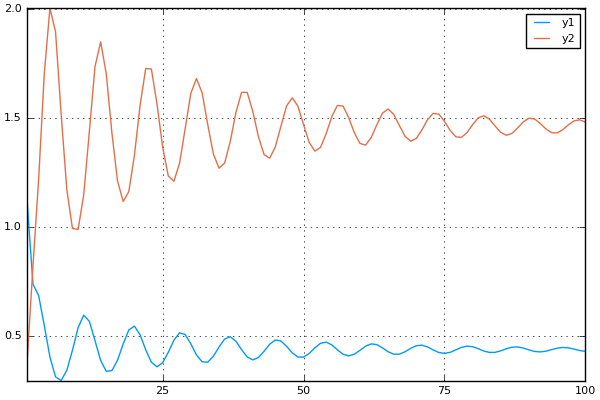

In [216]:
plot(Orbita([1.10,0.40], parametros, 100)[3],Orbita([1.10,0.40], parametros, 100)[1])
plot!(Orbita([1.10,0.40], parametros, 100)[3],Orbita([1.10,0.40], parametros, 100)[2])



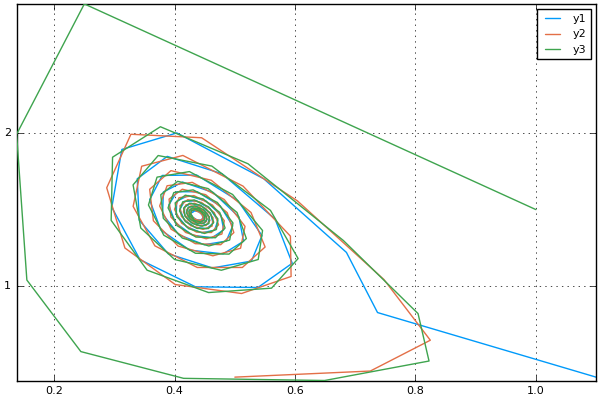

In [222]:
plot(Orbita([1.10,0.40],parametros,100)[1],Orbita([1.10,0.40],parametros,100)[2])
plot!(Orbita([0.5,0.40],parametros,100)[1],Orbita([0.5,0.40],parametros,100)[2])
plot!(Orbita([1,1.5],parametros,100)[1],Orbita([1,1.5],parametros,100)[2])





 En la gráfica podemos ver que hay un punto atractor alrededor de $(0.45,1,5)$
 Veamos si hay, en efecto, un punto fijo por esa zona. Encontraremos los puntos fijos en términos de los parámetros:

Buscamos $(P,D)$ tal que 

$P=P(1+(1-P))-\beta PD$,

$D=D(1-\delta)+\gamma DP$

Los puntos fijos del sistema son

- $(0,0)$

- $(1,0)$

- $(\frac{\delta}{\gamma},\frac{\alpha}{\beta}(1-\frac{\delta}{\gamma}))$

In [223]:
function PuntoFijo(parametros)
    a=parametros[1]
    b=parametros[2]
    c=parametros[3]
    d=parametros[4]
    x= c/d
    y=(a/b)*(1-(c/d))
    return[x,y]
end

PuntoFijo (generic function with 1 method)

In [224]:
parametros

4-element Array{Float64,1}:
 1.3
 0.5
 0.7
 1.6

In [225]:
Fijo1=PuntoFijo(parametros)
Fijo2=[0,0]
Fijo3=[1,0];

In [226]:
PuntoFijo(parametros)

2-element Array{Float64,1}:
 0.4375
 1.4625

In [227]:
LotkaVolterra(Fijo1,parametros)

(0.43749999999999994,1.4625000000000001)

In [228]:
M1=M+[0.001,0.001]

2-element Array{Float64,1}:
 0.1885
 2.1135

In [229]:
M1=M+[0.0001,0.0001]
X=[]
Y=[]
for i in 1:500
    push!(X,M1[1])
    
    push!(Y,M1[2])
    M1=LotkaVolterra(M1,parametros) 
end

    


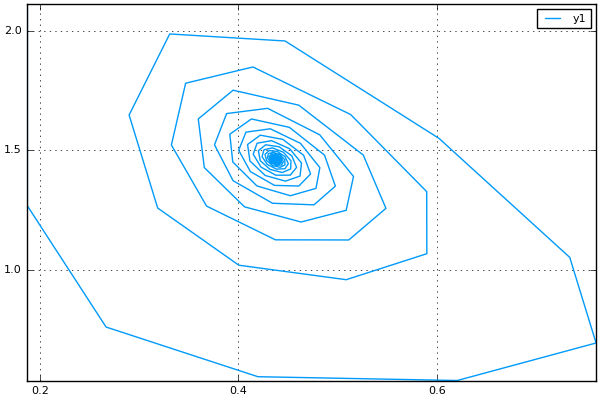

In [230]:
plot(X,Y)

In [231]:
x=[10,20]

2-element Array{Int64,1}:
 10
 20